In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json
import warnings
import missingno as msno

warnings.filterwarnings("ignore")
pd.set_option('max.columns', 100)

import seaborn as sns

import lightgbm as lgb
import catboost as cab


In [2]:
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_recall_fscore_support,roc_curve,auc,roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [3]:
path = "F:/2020/机器学习实验"

In [4]:
'***************************数据分析****************************'
base_info = pd.read_csv(path+"/dataset/train/base_info.csv")
annual_report_info = pd.read_csv(path+"/dataset/train/annual_report_info.csv")
tax_info = pd.read_csv(path+"/dataset/train/tax_info.csv")
change_info = pd.read_csv(path+"/dataset/train/change_info.csv")
news_info = pd.read_csv(path+"/dataset/train/news_info.csv")
other_info = pd.read_csv(path+"/dataset/train/other_info.csv")
entprise_info = pd.read_csv(path+"/dataset/train/entprise_info.csv")
entprise_evaluate = pd.read_csv(path+"/dataset/entprise_evaluate.csv")

base_info 数据大小
(24865, 33) 24865
id 24865
oplocdistrict 16
industryphy 20
industryco 345
dom 23278
opscope 20815
enttype 17
enttypeitem 31
opfrom 6620
opto 5746
state 6
orgid 78
jobid 434
adbusign 2
townsign 2
regtype 3
empnum 62
compform 2
parnum 51
exenum 50
opform 33
ptbusscope 0
venind 3
enttypeminu 26
midpreindcode 0
protype 2
oploc 5351
regcap 1143
reccap 597
forreccap 11
forregcap 38
congro 33
enttypegb 53


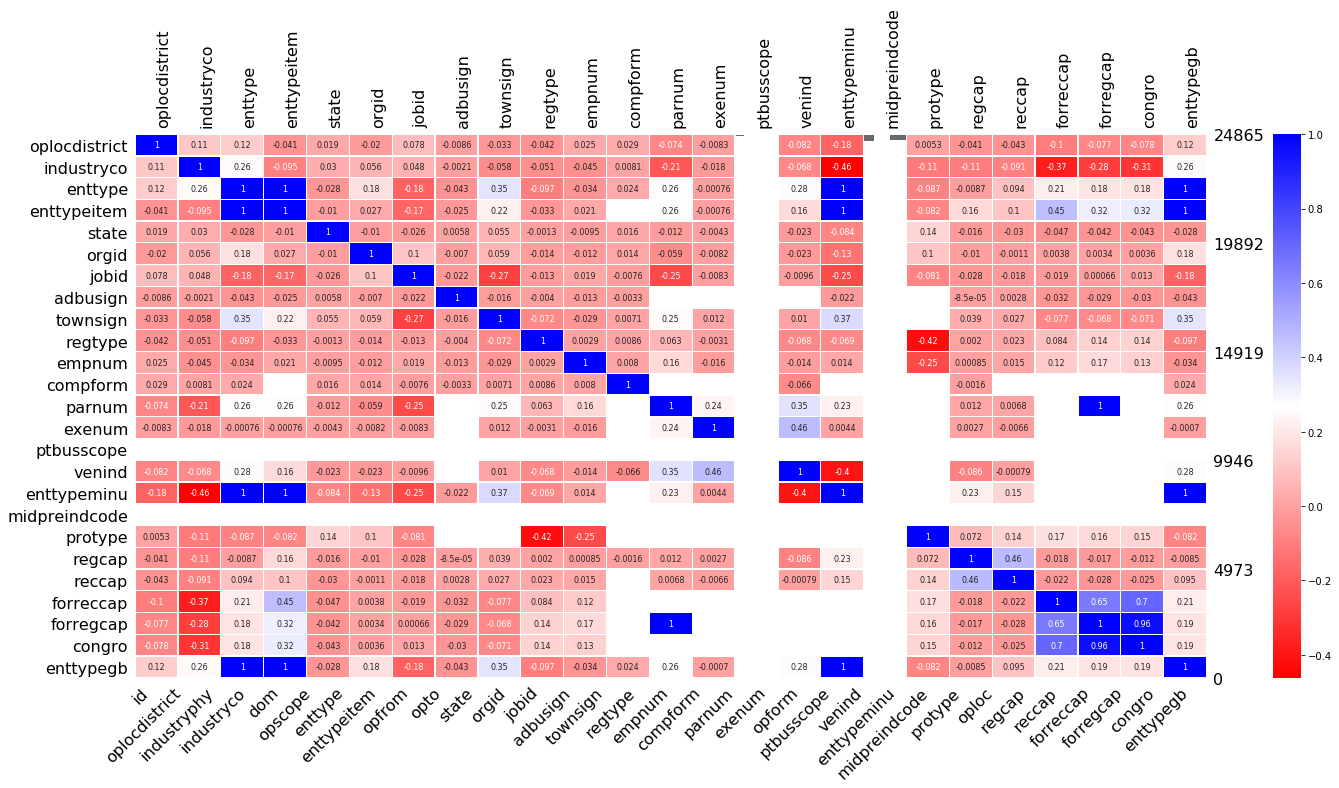

In [9]:
# ------------------base_info-------------------
print("base_info 数据大小")
print(base_info.shape, base_info['id'].nunique())
base_info.head(3)

# 查看缺失值
msno.bar(base_info)

# 查看表字段属性个数
for col in base_info.columns:
    print(col, base_info[col].nunique())

# corr协方差分析
import seaborn as sns
correlation_matrix = base_info.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="bwr_r", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

annual_report_info 数据大小
(22550, 23) 8937
id 8937
ANCHEYEAR 4
STATE 2
FUNDAM 167
MEMNUM 5
FARNUM 6
ANNNEWMEMNUM 3
ANNREDMEMNUM 1
EMPNUM 270
EMPNUMSIGN 2
BUSSTNAME 4
COLGRANUM 43
RETSOLNUM 14
DISPERNUM 5
UNENUM 35
COLEMPLNUM 94
RETEMPLNUM 26
DISEMPLNUM 16
UNEEMPLNUM 72
WEBSITSIGN 2
FORINVESTSIGN 2
STOCKTRANSIGN 2
PUBSTATE 3


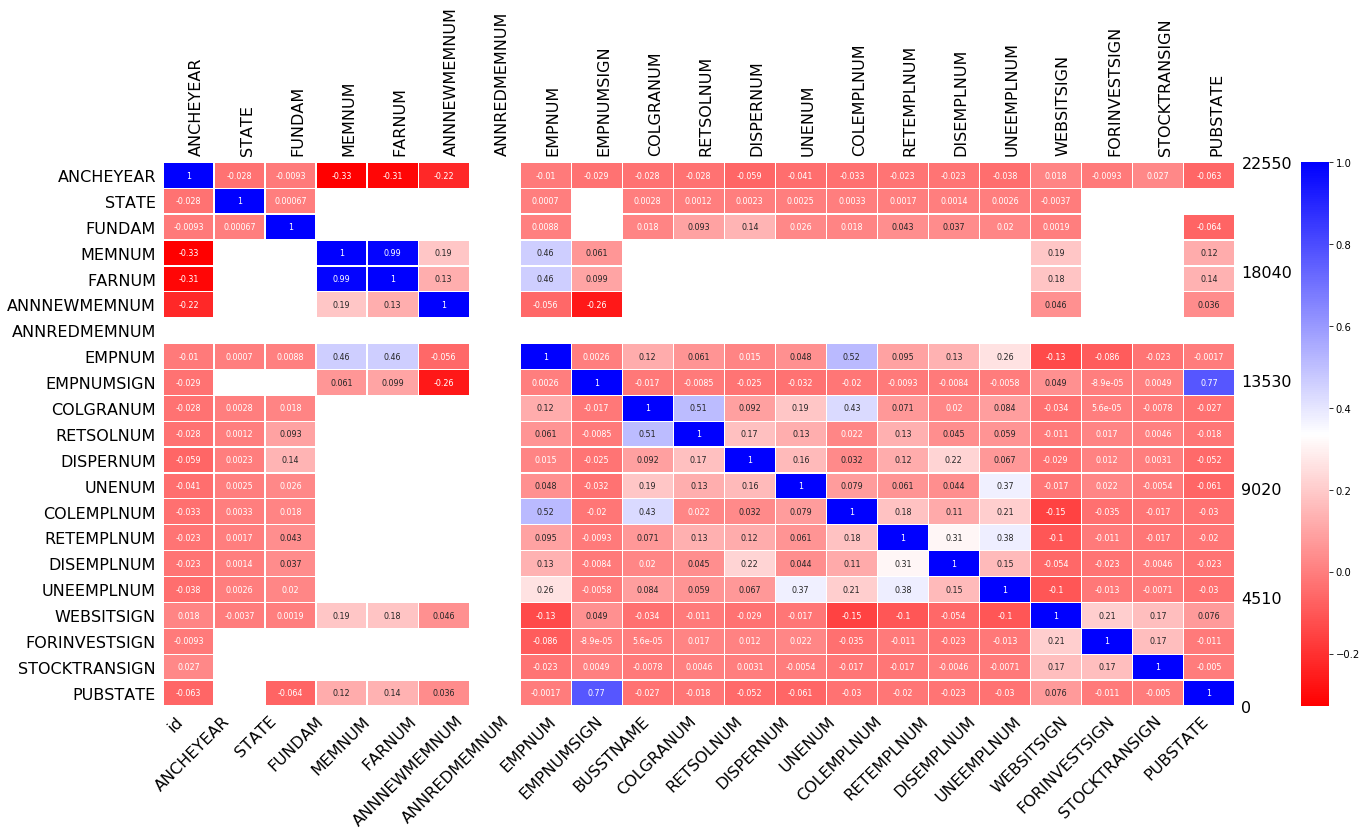

In [10]:
# ------------------annual_report_info-------------------
print("annual_report_info 数据大小")
print(annual_report_info.shape, annual_report_info['id'].nunique())
annual_report_info.head(3)

# 查看缺失值
msno.bar(annual_report_info)

# 查看表字段属性个数
for col in annual_report_info.columns:
    print(col, annual_report_info[col].nunique())

# corr协方差分析


# corr协方差分析
import seaborn as sns
correlation_matrix = annual_report_info.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="bwr_r", 
            linewidths=0.3,
            annot_kws={"size": 8})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

tax_info 数据大小
(29195, 9) 808
id 808
START_DATE 91
END_DATE 91
TAX_CATEGORIES 17
TAX_ITEMS 275
TAXATION_BASIS 1665
TAX_RATE 28
DEDUCTION 247
TAX_AMOUNT 4568


,TAXATION_BASIS,TAX_RATE,DEDUCTION,TAX_AMOUNT
TAXATION_BASIS,1.000000,-0.025323,-0.010943,0.221651
TAX_RATE,-0.025323,1.000000,0.507645,0.003519
DEDUCTION,-0.010943,0.507645,1.000000,0.054256
TAX_AMOUNT,0.221651,0.003519,0.054256,1.000000


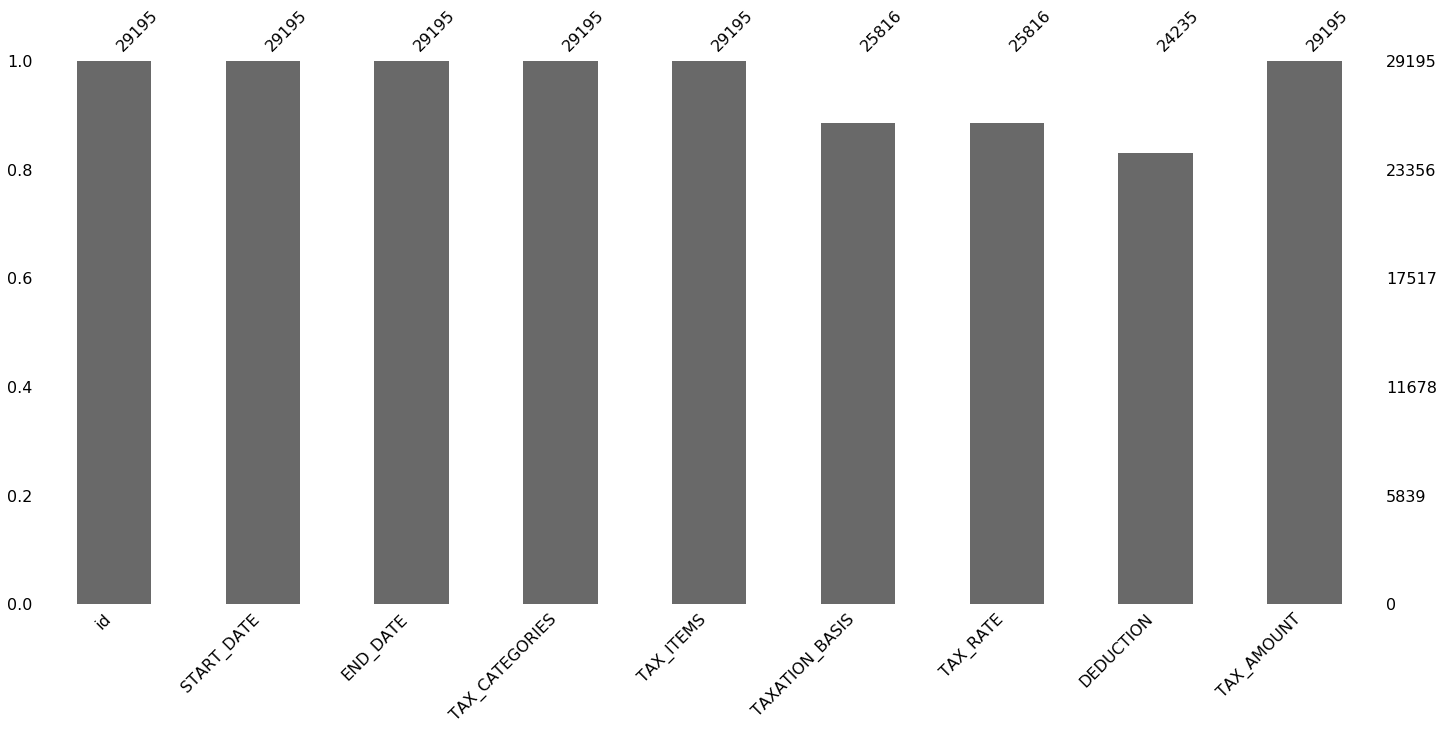

In [12]:
# ------------------tax_info-------------------
print("tax_info 数据大小")
print(tax_info.shape, tax_info['id'].nunique())
tax_info.head(3)

# 查看缺失值
msno.bar(tax_info)

# 查看表字段属性个数
for col in tax_info.columns:
    print(col, tax_info[col].nunique())

# corr协方差分析
tax_info.corr()

change_info 数据大小
(45940, 5) 8726
id 8726
bgxmdm 45
bgq 28802
bgh 30501
bgrq 23663


,bgxmdm,bgrq
bgxmdm,1.000000,0.178841
bgrq,0.178841,1.000000


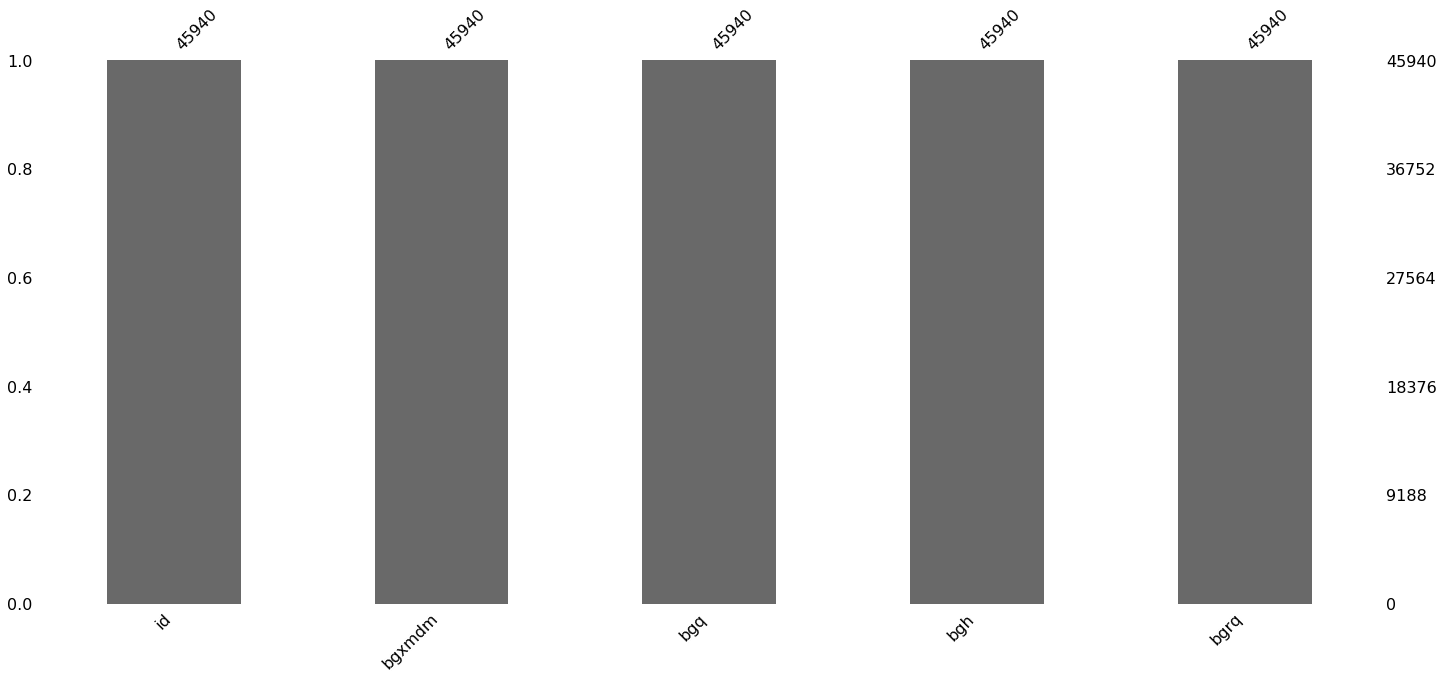

In [13]:
# ------------------change_info-------------------
print("change_info 数据大小")
print(change_info.shape, change_info['id'].nunique())
change_info.head(3)

# 查看缺失值
msno.bar(change_info)

# 查看表字段属性个数
for col in change_info.columns:
    print(col, change_info[col].nunique())

# corr协方差分析
change_info.corr()

news_info 数据大小
(10518, 3) 927
id 927
positive_negtive 3
public_date 2719


""


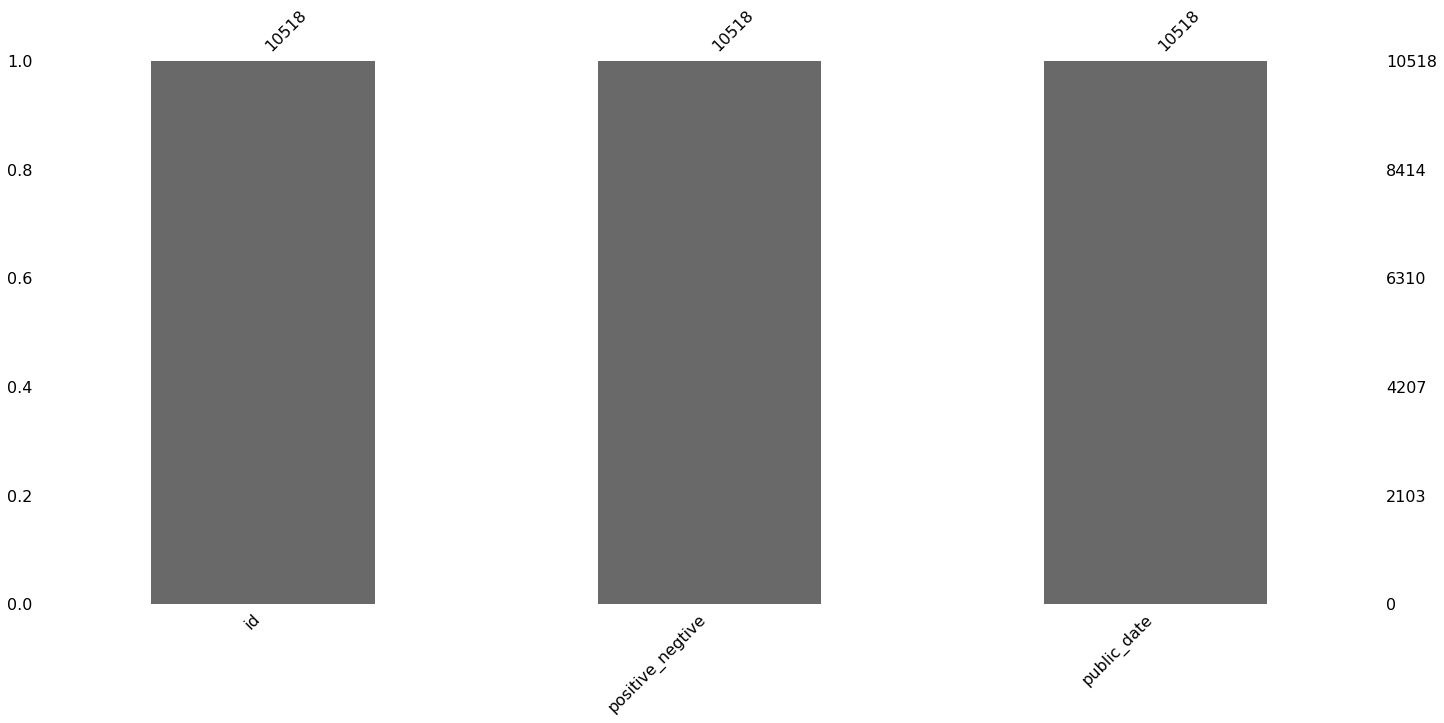

In [14]:
# ------------------news_info-------------------
print("news_info 数据大小")
print(news_info.shape, news_info['id'].nunique())
news_info.head(3)

# 查看缺失值
msno.bar(news_info)

# 查看表字段属性个数
for col in news_info.columns:
    print(col, news_info[col].nunique())

# corr协方差分析
news_info.corr()

other_info 数据大小
(1890, 4) 1888
id 1888
legal_judgment_num 93
brand_num 82
patent_num 114


,legal_judgment_num,brand_num,patent_num
legal_judgment_num,1.000000,0.017468,-0.017746
brand_num,0.017468,1.000000,0.347866
patent_num,-0.017746,0.347866,1.000000


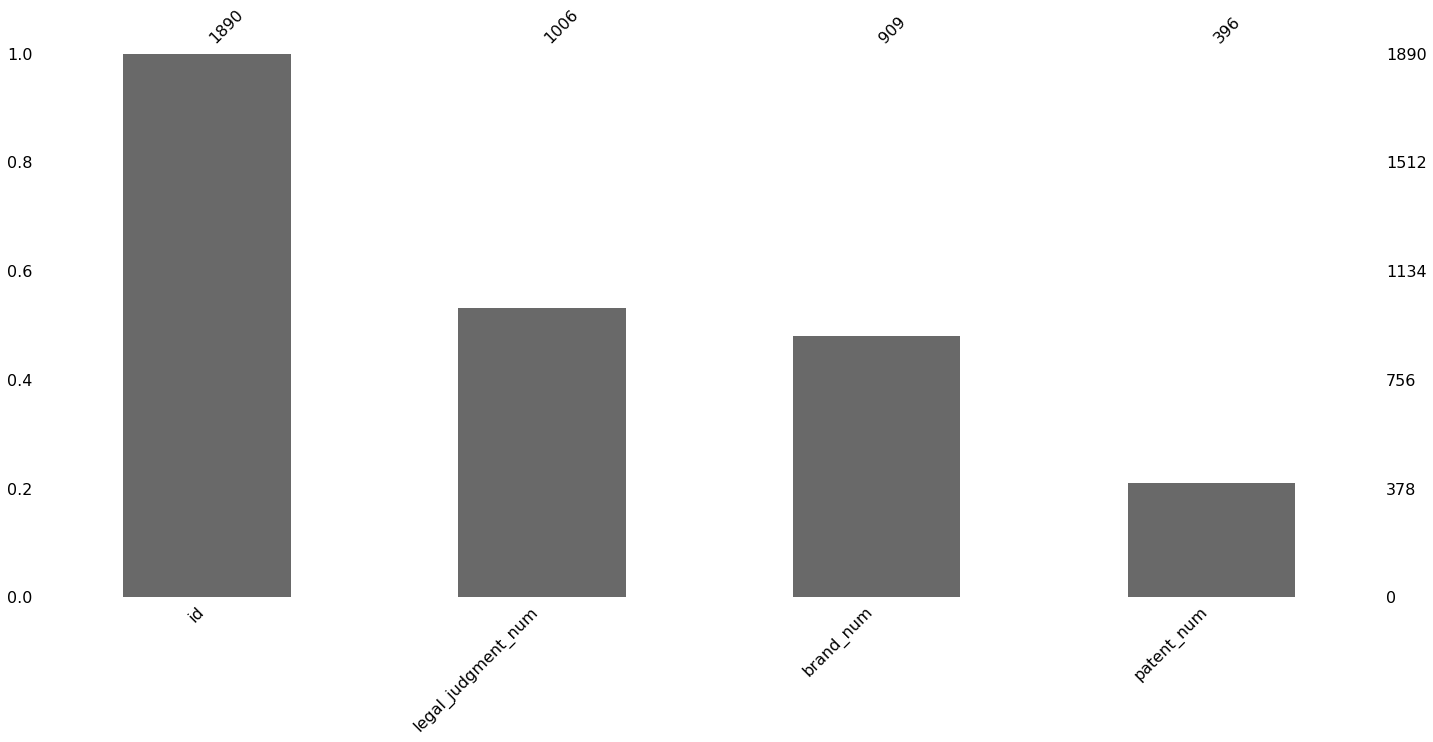

In [15]:
# ------------------other_info-------------------
print("other_info 数据大小")
print(other_info.shape, other_info['id'].nunique())
other_info.head(3)

# 查看缺失值
msno.bar(other_info)

# 查看表字段属性个数
for col in other_info.columns:
    print(col, other_info[col].nunique())

# corr协方差分析
other_info.corr()

In [16]:
# -----------------entprise_info---------------
entprise_info.head(1)
entprise_info.shape

(14865, 2)

In [17]:
# -----------------entprise_evaluate---------------
entprise_evaluate.head(1)
entprise_evaluate.shape

(10000, 2)

In [18]:
'*********************数据处理*************************'
def filter_col_by_nan(df, ratio=0.05):
    cols = []
    for col in df.columns:
        if df[col].isna().mean() >= (1-ratio):
            cols.append(col)
    return cols

# 剔除纯空列
base_info = base_info.drop(filter_col_by_nan(base_info, 0.01), axis=1)
annual_report_info = annual_report_info.drop(filter_col_by_nan(annual_report_info, 0.01), axis=1)


# 年报处理
annual_report_info_df = annual_report_info.groupby('id').agg({
    'ANCHEYEAR': ['max'],
    'STATE': ['max'],
    'FUNDAM': ['max'],
    'EMPNUM': ['max'],
    'UNEEMPLNUM': ['max', 'sum']
})
annual_report_info_df.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() 
                                for e in annual_report_info_df.columns.tolist()])
annual_report_info_df = annual_report_info_df.reset_index()


# 新闻处理
'处理时间'
news_info['public_date'] = news_info['public_date'].apply(lambda x: x if '-' in str(x) else np.nan)
news_info['public_date'] = pd.to_datetime(news_info['public_date'])
news_info['public_date'] = (datetime.now() - news_info['public_date']).dt.days
'处理新闻个数信息'
news_info_df = news_info.groupby('id').agg({'public_date': ['count','max','min','mean']}).reset_index()
news_info_df.columns = ['id', 'public_date_COUNT', 'public_MAX', 'public_MIN', 'public_MEAN']
news_info_df2 = pd.pivot_table(news_info, index='id', columns='positive_negtive', aggfunc='count').reset_index()
news_info_df2.columns = ['id', 'news_COUNT1', 'news_COUNT2', 'news_COUNT3']
news_info_df = pd.merge(news_info_df, news_info_df2)


# 税务信息
tax_info_df = tax_info.groupby('id').agg({
    'TAX_CATEGORIES': ['count'],
    'TAX_ITEMS': ['count'],
    'TAXATION_BASIS': ['count'],
    'TAX_AMOUNT': ['max', 'min', 'mean'],
})
tax_info_df.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() 
                                for e in tax_info_df.columns.tolist()])
tax_info_df = tax_info_df.reset_index()

# 变更信息
change_info['bgrq'] = (change_info['bgrq'] / 10000000000).astype(int)
change_info_df = change_info.groupby('id').agg({
    'bgxmdm': ['count', 'nunique'],
    'bgq':['nunique'],
    'bgh': ['nunique'],
    'bgrq': ['nunique'],
})
change_info_df.columns = pd.Index(['changeinfo_' + e[0] + "_" + e[1].upper() 
                                for e in change_info_df.columns.tolist()])
change_info_df = change_info_df.reset_index()


# 其它信息
other_info = other_info[~other_info['id'].duplicated()]
other_info['other_SUM'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].sum(1)
other_info['other_NULL_SUM'] = other_info[['legal_judgment_num', 'brand_num', 'patent_num']].isnull().astype(int).sum(1)

In [19]:
# 基本信息处理
print(base_info.info())

## 字段转换
base_info['district_FLAG1'] = (base_info['orgid'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6])).astype(int)
base_info['district_FLAG2'] = (base_info['orgid'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['jobid'].fillna('').apply(lambda x: str(x)[:6])).astype(int)
base_info['district_FLAG3'] = (base_info['oplocdistrict'].fillna('').apply(lambda x: str(x)[:6]) == \
    base_info['jobid'].fillna('').apply(lambda x: str(x)[:6])).astype(int)

## 员工数量处理，保留员工总数
base_info['person_SUM'] = base_info[['empnum', 'parnum', 'exenum']].sum(1)
base_info['person_NULL_SUM'] = base_info[['empnum', 'parnum', 'exenum']].isnull().astype(int).sum(1)

## 处理时间获得企业经营时间
base_info['opfrom'] = pd.to_datetime(base_info['opfrom'])
base_info['opto'] = pd.to_datetime(base_info['opto'])
base_info['opfrom_TONOW'] = (datetime.now() - base_info['opfrom']).dt.days
base_info['opfrom_TIME'] = (base_info['opto'] - base_info['opfrom']).dt.days

## 经营范围数量
base_info['opscope_COUNT'] = base_info['opscope'].apply(lambda x: len(x.replace("\t", "，").replace("\n", "，").split('、')))


cat_col = ['oplocdistrict', 'industryphy', 'industryco', 'enttype',
           'enttypeitem', 'enttypeminu', 'enttypegb',
          'dom', 'oploc', 'opform']

for col in cat_col:
    base_info[col + '_COUNT'] = base_info[col].map(base_info[col].value_counts())
    col_idx = base_info[col].value_counts()
    for idx in col_idx[col_idx < 10].index:
        base_info[col] = base_info[col].replace(idx, -1)        

base_info = base_info.drop(['opfrom', 'opto'], axis=1)

for col in ['industryphy', 'dom', 'opform', 'oploc']:
    base_info[col] = pd.factorize(base_info[col])[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24865 entries, 0 to 24864
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             24865 non-null  object 
 1   oplocdistrict  24865 non-null  int64  
 2   industryphy    24865 non-null  object 
 3   industryco     24864 non-null  float64
 4   dom            24865 non-null  object 
 5   opscope        24865 non-null  object 
 6   enttype        24865 non-null  int64  
 7   enttypeitem    16651 non-null  float64
 8   opfrom         24865 non-null  object 
 9   opto           8825 non-null   object 
 10  state          24865 non-null  int64  
 11  orgid          24865 non-null  int64  
 12  jobid          24865 non-null  int64  
 13  adbusign       24865 non-null  int64  
 14  townsign       24865 non-null  int64  
 15  regtype        24865 non-null  int64  
 16  empnum         19615 non-null  float64
 17  compform       10631 non-null  float64
 18  parnum

In [20]:
'***************数据拼接******************'
train_data = pd.merge(base_info, entprise_info, on='id')
train_data = pd.merge(train_data, other_info, on='id', how='left')

train_data = pd.merge(train_data, news_info_df, on='id', how='left')
train_data = pd.merge(train_data, tax_info_df, on='id', how='left')
train_data = pd.merge(train_data, annual_report_info_df, on='id', how='left')
train_data = pd.merge(train_data, change_info_df, on='id', how='left')

entprise_evaluate = entprise_evaluate[['id']]
test_data = pd.merge(base_info, entprise_evaluate, on='id')
test_data = pd.merge(test_data, other_info, on='id', how='left')
test_data = pd.merge(test_data, news_info_df, on='id', how='left')
test_data = pd.merge(test_data, tax_info_df, on='id', how='left')
test_data = pd.merge(test_data, annual_report_info_df, on='id', how='left')
test_data = pd.merge(test_data, change_info_df, on='id', how='left')

train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14865 entries, 0 to 14864
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         14865 non-null  object 
 1   oplocdistrict              14865 non-null  int64  
 2   industryphy                14865 non-null  int64  
 3   industryco                 14864 non-null  float64
 4   dom                        14865 non-null  int64  
 5   opscope                    14865 non-null  object 
 6   enttype                    14865 non-null  int64  
 7   enttypeitem                10228 non-null  float64
 8   state                      14865 non-null  int64  
 9   orgid                      14865 non-null  int64  
 10  jobid                      14865 non-null  int64  
 11  adbusign                   14865 non-null  int64  
 12  townsign                   14865 non-null  int64  
 13  regtype                    14865 non-null  int

# 模型搭建

## 评价函数 与 K折训练

In [21]:
'*********************模型搭建********************'
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

def eval_score(y_test,y_pre):
    _,_,f_class,_=precision_recall_fscore_support(y_true=y_test,y_pred=y_pre,labels=[0,1],average=None)
    fper_class={'合法':f_class[0],'违法':f_class[1],'f1':f1_score(y_test,y_pre)}
    return fper_class

his_y = []


def k_fold_serachParmaters(model,train_val_data,train_val_kind,test_kind,flag=False,k_fold=10):
    mean_f1=0
    mean_f1Train=0
    n_splits=k_fold
    
    his = []

    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2623)
    
    pred_Test = np.zeros(len(test_kind))
    for train, test in sk.split(train_val_data, train_val_kind):
        x_train = train_val_data.iloc[train]
        y_train = train_val_kind.iloc[train]
        x_test = train_val_data.iloc[test]
        y_test = train_val_kind.iloc[test]
        
        evals_result = {}

        model.fit(x_train, y_train, 
                  eval_set=[(x_test, y_test)], 
                  verbose=1000,
                  plot=flag
                 )
        
        pred = model.predict(x_test)
        fper_class = eval_score(y_test,pred)
        
        pred_Train = model.predict(x_train)
        pred_Test += model.predict_proba(test_kind)[:, 1]/n_splits
        fper_class_train = eval_score(y_train,pred_Train)
        
        
        

        mean_f1 += fper_class['f1']/n_splits
        mean_f1Train+=fper_class_train['f1']/n_splits
        
        
    his_y.append(mean_f1)
        #print(mean_f1, mean_f1Train)
        
        
    return mean_f1, pred_Test

## CatBoostClassifier 单独训练

In [22]:
score_tta = None
score_list = []
clf=CatBoostClassifier(
       loss_function="Logloss",
       eval_metric="F1",
       task_type="CPU",
       learning_rate=0.02,
       iterations=10000,
       random_seed=2020,
       od_type="Iter",
       depth=8,
       early_stopping_rounds=300,
   )

score, test_pred  = k_fold_serachParmaters(clf,
                       train_data.drop(['id', 'opscope','label'], axis=1),
                       train_data['label'],
                       test_data.drop(['id', 'opscope'], axis=1),
                       flag=True,k_fold=2,
                      )
print(score)

0:	learn: 0.7426956	test: 0.7531220	best: 0.7531220 (0)	total: 111ms	remaining: 18m 25s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.8356997972
bestIteration = 428

Shrink model to first 429 iterations.


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7319244	test: 0.6853933	best: 0.6853933 (0)	total: 15.7ms	remaining: 2m 36s
Stopped by overfitting detector  (300 iterations wait)

bestTest = 0.84295846
bestIteration = 254

Shrink model to first 255 iterations.
0.83932912856999


In [ ]:
score_tta = None
score_list = []
tta_fold = 3

start = datetime.now()
for _ in range(tta_fold):
    
    clf=CatBoostClassifier(
           loss_function="Logloss",
           eval_metric="F1",
           task_type="CPU",
           learning_rate=0.01,
           iterations=10000,
           random_seed=2020,
           od_type="Iter",
           depth=8,
           early_stopping_rounds=500,
       )

    score, test_pred  = k_fold_serachParmaters(clf,
                           train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'],
                           test_data.drop(['id', 'opscope'], axis=1),
                          )

    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    # print(score)
    score_list.append(score)

print(np.array(score_list).mean(), np.array(score_list).std())
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
print('用时: %d s' % (int((datetime.now() - start).seconds)))

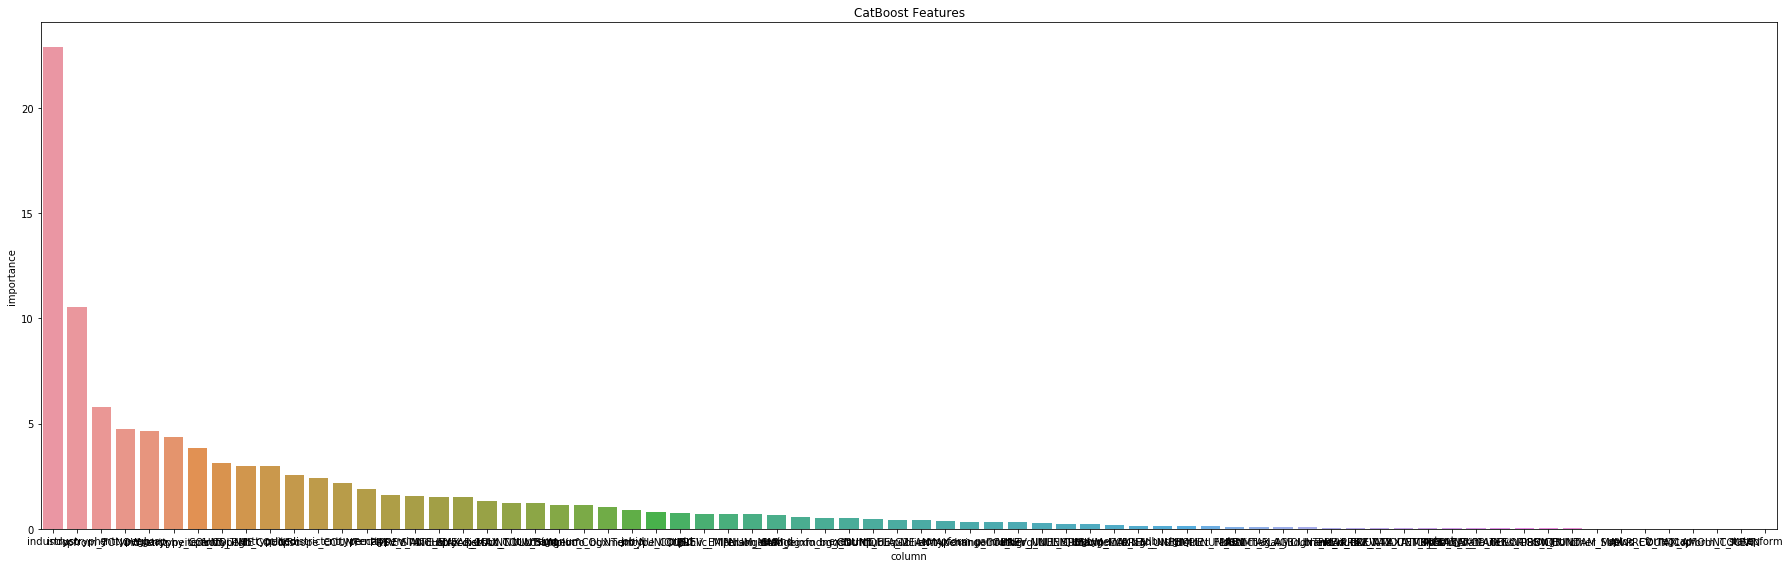

In [27]:
feature_names_pd = pd.DataFrame({'column': clf.feature_names_,
                                 'importance': clf.feature_importances_,
                                 })
plt.figure(figsize=(25, 8))
sns.barplot(x="column", y="importance", data=feature_names_pd.sort_values(by="importance", ascending=False))
plt.title('CatBoost Features')
plt.tight_layout()

# catboost 的可视化

In [ ]:
train_val_data = train_data.drop(['id', 'opscope','label'], axis=1)
data_valid = train_val_data
train_val_kind = train_data['label']
y = train_val_kind
test_kind = test_data.drop(['id', 'opscope'], axis=1)

In [ ]:
import shap
from catboost import Pool
shap_values = clf.get_feature_importance(Pool(data_valid, y), type='ShapValues')

In [ ]:
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[:,:], data_valid.iloc[:,:])

In [81]:
res = clf.calc_feature_statistics(data_valid,
                                    y,
                                    feature=[1,2],
                                    plot=True)

In [ ]:
lg = clf=CatBoostClassifier(
    iterations=5000,
    random_seed=2020,
    od_type='Iter',
    task_type="CPU",
    loss_function='Logloss'
)
param_dist = {'depth': [7,8,9],
              'learning_rate' : [0.01,0.05],
           #   "iterations": [5000, 7000, 10000],
            #  'l2_leaf_reg': [1,4,9],
           #   'early_stopping_rounds':[500,1000],
          #'loss_function':['MultiClass','Logloss'],
             }

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring='f1', verbose=5)
grid_search.fit(train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'])
grid_search.best_estimator_, grid_search.best_score_


## LGBMClassifier

In [38]:
'*********************模型搭建********************'
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

def eval_score(y_test,y_pre):
    _,_,f_class,_=precision_recall_fscore_support(y_true=y_test,y_pred=y_pre,labels=[0,1],average=None)
    fper_class={'合法':f_class[0],'违法':f_class[1],'f1':f1_score(y_test,y_pre)}
    return fper_class

his_y = []


def k_fold_serachParmaters(model,train_val_data,train_val_kind,test_kind,flag=False,k_fold=10):
    mean_f1=0
    mean_f1Train=0
    n_splits=k_fold
    
    cat_features = ['oplocdistrict', 'industryphy', 'industryco', 'enttype',
           'enttypeitem', 'enttypeminu', 'enttypegb',
          'dom', 'oploc', 'opform']
    
    his = []

    sk = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=2623)
    
    pred_Test = np.zeros(len(test_kind))
    for train, test in sk.split(train_val_data, train_val_kind):
        x_train = train_val_data.iloc[train]
        y_train = train_val_kind.iloc[train]
        x_test = train_val_data.iloc[test]
        y_test = train_val_kind.iloc[test]
        
        evals_result = {}

        model.fit(x_train, y_train, 
                  eval_set=[(x_test, y_test)], 
                  categorical_feature = cat_features,
                  verbose=1000,eval_metric='auc',
                 )
        
        pred = model.predict(x_test)
        fper_class = eval_score(y_test,pred)
        
        pred_Train = model.predict(x_train)
        pred_Test += model.predict_proba(test_kind)[:, 1]/n_splits
        fper_class_train = eval_score(y_train,pred_Train)
        
        
        

        mean_f1 += fper_class['f1']/n_splits
        mean_f1Train+=fper_class_train['f1']/n_splits
        
        
    his_y.append(mean_f1)
        #print(mean_f1, mean_f1Train)
        
        
    return mean_f1, pred_Test

In [39]:
score_tta = None
score_list = []

tta_fold = 3
cat_features = []

for _ in range(tta_fold):
    clf1 = lgb.LGBMClassifier(
        num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
        max_depth=7,learning_rate=0.03,
        n_estimators=150,n_jobs=-1)

    score, test_pred  = k_fold_serachParmaters(clf1,
                           train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'],
                           test_data.drop(['id', 'opscope'], axis=1),
                          )

    if score_tta is None:
        score_tta = test_pred/tta_fold
    else:
        score_tta += test_pred/tta_fold
    # print(score)
    score_list.append(score)
    
print(np.array(score_list).mean(), np.array(score_list).std())


0.84711656837122 0.0009323050962912252


## LGBM 模型可视化

In [40]:
train_val_data = train_data.drop(['id', 'opscope','label'], axis=1)
data_valid = train_val_data
train_val_kind = train_data['label']
y = train_val_kind
test_kind = test_data.drop(['id', 'opscope'], axis=1)


In [41]:
import shap
shap_values = shap.TreeExplainer(clf1.booster_).shap_values(data_valid.iloc[:10000,:])
print('length of shape: ', len(shap_values))
print('y: ', set(y))

length of shape:  2
y:  {0, 1}


In [42]:
global_importances = np.abs(shap_values).mean(0)[:-1]
global_importances

array([[2.75603040e-04, 5.60768682e-01, 1.56778675e-01, ...,
        4.35040846e-04, 1.30192214e-04, 6.85503458e-03],
       [2.75603040e-04, 3.82894028e-01, 4.61087206e-02, ...,
        4.87312375e-04, 1.16254581e-04, 3.21475676e-03],
       [3.04415869e-03, 4.51892690e+00, 3.30053016e-01, ...,
        8.43666575e-04, 2.72916228e-03, 1.37897992e-02],
       ...,
       [2.75603040e-04, 5.75728348e-01, 3.36223736e-02, ...,
        4.35040846e-04, 1.16254581e-04, 8.38927142e-03],
       [2.75603040e-04, 5.75478659e-01, 1.86123969e-01, ...,
        3.65218622e-04, 1.33678458e-03, 1.12793427e-02],
       [2.75603040e-04, 5.80363770e-01, 7.43904338e-02, ...,
        4.12980139e-04, 8.67516387e-04, 4.98574877e-03]])

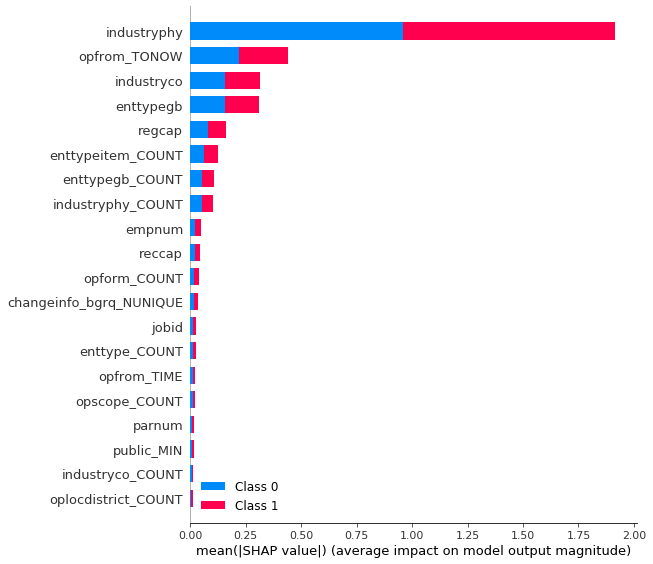

In [43]:
shap.summary_plot(shap_values, data_valid.iloc[:10000,:]) ##不同属性在不同分类上的重要程度 对于每一个样本，不同特征对于模型影响的绝对平均值

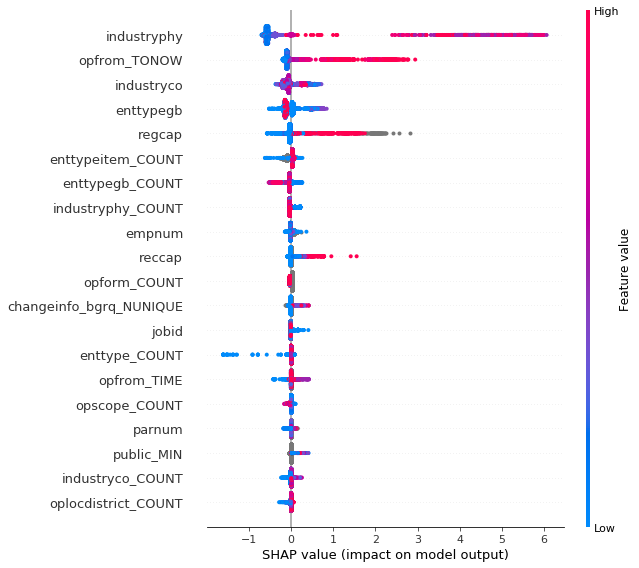

In [44]:
shap.summary_plot(shap_values[1], data_valid.iloc[:10000,:])  ## 行业类别  经营时间  企业类型  是比较重要的

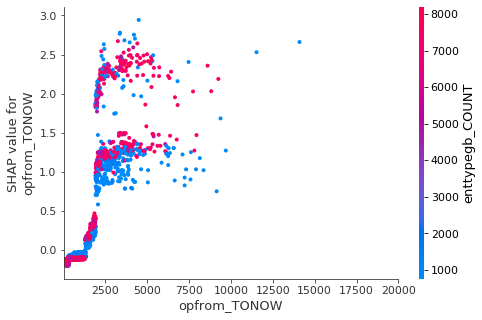

In [45]:
shap.dependence_plot("opfrom_TONOW", shap_values[1], data_valid.iloc[:10000,:],show=False) ## 企业经营时间的不同影响
plt.xlim(1,20000)
plt.show()

In [46]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X_display.iloc[:1000,:])

NameError: name 'explainer' is not defined

0.8462155099612678 0.000980512586304723
0.8477649783242868 0.00016004496602837204
0.8473254424952468 0.0010063932717432982
0.8473704711271628 0.0002660815390543047
0.8446806526150558 0.00039917173538738237
0.8464952385955559 0.0013457617495522775
0.8454879414144827 0.0007421655493294064
0.8464588791893429 0.0008730014821534744
0.8467970656054922 0.0010073458494821174
0.8459759720204648 0.0011049735229895048
0.8471082002308136 0.0012211270095911534
0.8458333982742902 0.0015238756259102273
0.8462841489648684 0.0009114188140862082
0.846901138989152 0.0007083078533542544
0.8461448592190023 0.0007211184989720449
0.8459218330738852 0.0013233648887827272
0.845948905780812 0.0009249190055122772
0.8477540699448078 0.00030466315385424146
0.8470143078699254 0.0008195151526499244
0.8476816057524843 0.0004363396317379211
0.8463138055627931 0.0013306291278178976
0.846025906457545 0.0011918161794607094
0.8468452075086134 0.000971196388134185
0.8470729838686072 0.0009280237010907904


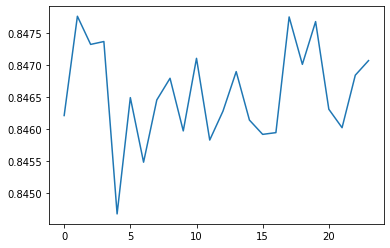

In [47]:
his_s = []

features = ['oplocdistrict', 'industryphy', 'industryco', 'enttype','reccap','state',
           'enttypeitem', 'enttypeminu', 'enttypegb','reccap','compform','district_FLAG1','district_FLAG2','district_FLAG3',
          'dom', 'oploc', 'opform','oploc_COUNT','enttypeitem_COUNT','adbusign']

for i in range(24):
    cat_features = features[0:i]
    score_tta = None
    score_list = []

    tta_fold = 3

    for _ in range(tta_fold):
        clf = lgb.LGBMClassifier(
            num_leaves=np.random.randint(6, 10), min_child_samples= np.random.randint(2,5),
            max_depth=7,learning_rate=0.03,
            n_estimators=150,n_jobs=-1)

        score, test_pred  = k_fold_serachParmaters(clf,
                               train_data.drop(['id', 'opscope','label'], axis=1),
                               train_data['label'],
                               test_data.drop(['id', 'opscope'], axis=1),
                               cat_features,
                              )

        if score_tta is None:
            score_tta = test_pred/tta_fold
        else:
            score_tta += test_pred/tta_fold
        # print(score)
        score_list.append(score)
    
    his_s.append(np.array(score_list).mean())
    print(np.array(score_list).mean(), np.array(score_list).std())
    

plt.plot(his_s)
plt.show()

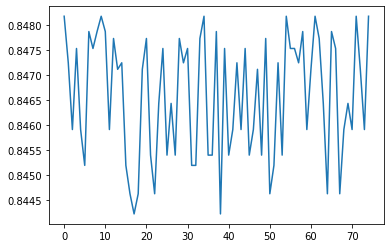

In [48]:
plt.plot(his_y)
plt.show()

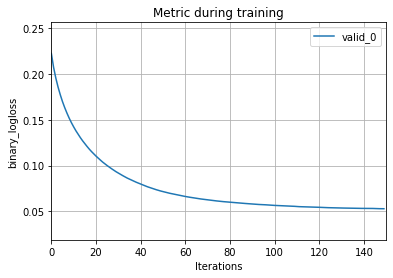

In [49]:
ax = lgb.plot_metric(clf)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [ ]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [4,5,7],
              "learning_rate" : [0.01,0.05],
              "num_leaves": [5, 7, 8],
              "n_estimators": [50, 100, 150]
             }

cat_features = ['oplocdistrict', 'industryphy', 'industryco', 'enttype',
           'enttypeitem', 'enttypeminu', 'enttypegb',
          'dom', 'oploc', 'opform']

grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring='f1', verbose=5)
grid_search.fit(train_data.drop(['id', 'opscope','label'], axis=1),
                           train_data['label'], categorical_feature = cat_features,)
grid_search.best_estimator_, grid_search.best_score_


In [ ]:
s = grid_search.score
plt.plot(grid_search.score)
plt.show()

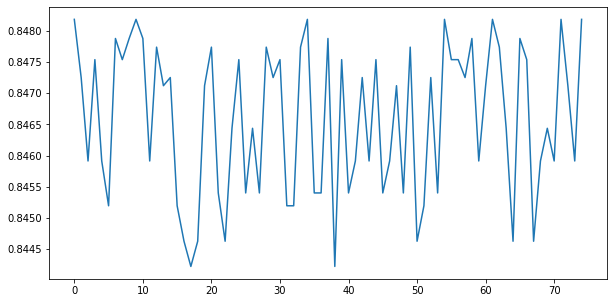

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(his_y)
plt.show()

In [ ]:
feature_names_pd = pd.DataFrame({'column': clf.feature_names_,
                                 'importance': clf.feature_importances_,
                                 })
plt.figure(figsize=(10, 15))
sns.barplot(x="importance", y="column", data=feature_names_pd.sort_values(by="importance", ascending=False))
plt.title('CatBoost Features')
plt.tight_layout()

In [ ]:
ax = lgb.plot_metric(clf)
plt.rcParams["figure.figsize"] = (10, 5)
plt.show()

In [ ]:
base_info.info()

In [ ]:
lgb.plot_importance(clf)
plt.rcParams["figure.figsize"] = (14, 10)
plt.show()

In [ ]:
sns.set()
fpr, tpr, thresh = roc_curve(y_train,pred_Train)
plt.plot(fpr, tpr)
plt.show()